In [27]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 28 22:06:19 2019

@author: Ruchika
"""

from collections import Counter
import matplotlib.pyplot as plt

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
friend_counts = Counter(num_friends)#Create a dictionary with friend_number as key and its count as value


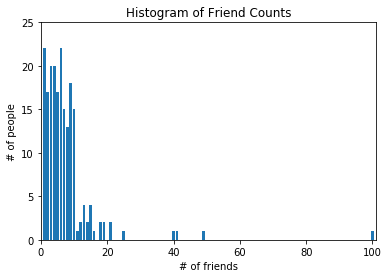

In [28]:
######################################################################################
###########################       Histogram plot    #################################
######################################################################################

xs = [x for x in range(101)]#Largest value is 100
ys = [friend_counts[x] for x in xs]
plt.figure
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [29]:
# Find number of points
num_points = len(num_friends)
largest_value = max(num_friends)# Largest value
smallest_value = min(num_friends)# Smallest value

sorted_values = sorted(num_friends)#Sorted values
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

In [30]:
######################################################################################
###########################   Find mean of dataponts  ################################
######################################################################################

from typing import List

#Find mean of the data
def mean(xs: List[float]) -> float:
    return sum(xs)/len(xs)


In [31]:
mean(num_friends)

7.333333333333333

In [32]:
######################################################################################
###########################   Find median of dataponts  ################################
######################################################################################

def _median_odd(xs: List[float]) -> float:
    #If the length of xs is odd, median is the middle value after sorting the array
    return (sorted(xs)[len(xs)//2])

def _median_even(xs: List[float]) -> float:
    #If the length of xs is even, median is the average of the sorted middle two elements
    idx = len(xs)//2    
    return (sum(sorted(xs)[idx-1:idx+1])*0.5)

def median(v: List[float]) -> float:
    return _median_even(v) if len(v)%2 == 0 else _median_odd(v)

In [33]:
median([1,10,2,9,5])

5

In [34]:
median([1,5,2,9])

3.5

In [35]:
######################################################################################
#####################   Returns the certain percentile (p) of the data  ##############
######################################################################################

def quantile(xs:  List[float], p:float)-> float:
    p_index = int(p*len(xs))
    return sorted(xs)[p_index]


# Call function
quantile(num_friends,0.1)
quantile(num_friends,0.5)
quantile(num_friends,0.75)

9

In [36]:
######################################################################################
###########################   Find mode of dataponts  ################################
######################################################################################

def mode(x: List[float]) -> float:
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

In [37]:
mode(num_friends)

[6, 1]

In [38]:
######################################################################################
##########    Dispersion of the data can be measured using range  ###################
######################################################################################

def data_range(xs: List[float])-> float:
    return max(xs) - min(xs)

In [39]:
data_range(num_friends)

99.0

In [40]:
######################################################################################
##########    A more complex measure of dispersion of data is variance  ##############
######################################################################################

def de_mean(xs: List[float]) -> float:
    #Subtract mean from each element of xs
    x_bar = mean(xs)
    return [x-x_bar for x in xs]

def variance(xs: List[float]) -> float:
    #Almost the average squared deviation from the mean
    assert(len(xs)>=2),"variance requires atleast two elements"
    sum_of_squares = sum(x*x for x in de_mean(xs))
    return sum_of_squares/(len(xs)-1)
    
    

In [41]:
variance(num_friends)

81.54351395730716

In [42]:
######################################################################################
########## Dispersion of data can also be quantified using standard deviation  #######
######################################################################################

import math

def standard_deviation(xs: List[float]) -> float:
    #Standard deviation is the square root of variance
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

9.03014473623248

In [43]:
######################################################################################
###########################   Find interquantile range ################################
######################################################################################

def interquantile_range(xs: List[float])-> float:
    #Returns the difference between the 75%-tile and the 25%-tile
    return quantile(xs,0.75) - quantile(xs,0.25)

interquantile_range(num_friends)

6

In [44]:
######################################################################################
###########################   Find covariance of two vectors #########################
######################################################################################
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(xs: List[float], ys: List[float])-> float:
    sum_of_squares = sum(x*y for x,y in zip(de_mean(xs),de_mean(ys)))
    return sum_of_squares/(len(xs)-1)

In [45]:
covariance(num_friends,daily_minutes)

22.425435139573064

In [46]:
######################################################################################
############## Correlation is unitless and always lies between #######################
################-1 (perfect anticorrelation) & 1 (perfect correlation)################
######################################################################################

def correlation(xs: List[float], ys: List[float])-> float:
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x>0 and stdev_y>0:
        return covariance(xs,ys)/stdev_x/stdev_y
    else:
        return 0

In [47]:
correlation(num_friends,daily_minutes)

0.24736957366478218

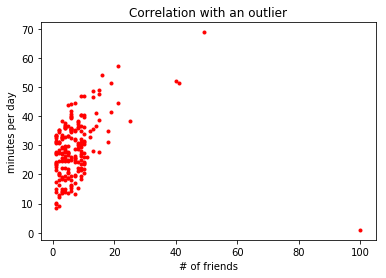

In [48]:
######################################################################################
######################  Plot distribution of the data ################################
######################################################################################

from matplotlib import pyplot as plt
plt.figure()
plt.scatter(num_friends,daily_minutes,color='red',marker = '.')
plt.title("Correlation with an outlier")#Title
plt.ylabel("minutes per day")#Adding label to the y-axis
plt.xlabel("# of friends")#Adding label to the x-axis
plt.show()

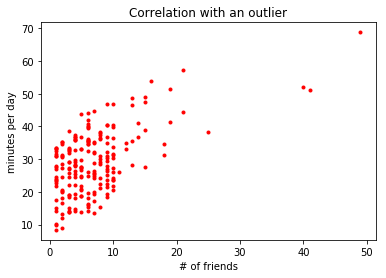

In [49]:
# Correlation is very sensitive to outliers
# Remove outlier

outlier = num_friends.index(100) #Index of the outlier

num_friends_good = [x
                   for i, x in enumerate(num_friends)# i(index) and x(value)
                   if i!=outlier]
daily_minutes_good = [x
                   for i, x in enumerate(daily_minutes)# i(index) and x(value)
                   if i!=outlier]

daily_hours_good = [dm/60 for dm in daily_minutes_good]

plt.figure()
plt.scatter(num_friends_good,daily_minutes_good,color='red',marker = '.')
plt.title("Correlation with an outlier")#Title
plt.ylabel("minutes per day")#Adding label to the y-axis
plt.xlabel("# of friends")#Adding label to the x-axis
plt.show()
